In [1]:
from main import api

In [2]:
params, mappings = api.get_from_data_parameters('./data/vaccines.json')

In [3]:
model = api.obtain_model(params)

Academic license - for non-commercial use only - expires 2021-08-02
Using license file D:\Users\gabri\gurobi.lic


In [4]:
model.read("out.mps")

Read MIP start from file out.mst


In [5]:
model.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 6 logical processors, using up to 6 threads
Optimize a model with 8305 rows, 6100 columns and 41900 nonzeros
Model fingerprint: 0x96e62ac8
Variable types: 500 continuous, 5600 integer (2800 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+12]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

User MIP start produced solution with objective 240000 (0.03s)
Loaded user MIP start with objective 240000

Presolve removed 7402 rows and 4000 columns
Presolve time: 0.03s
Presolved: 903 rows, 2100 columns, 4200 nonzeros
Variable types: 0 continuous, 2100 integer (1800 binary)

Root relaxation: cutoff, 303 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | In

In [6]:
import pandas as pd

In [7]:
from vacunacion_regional.data_management.postprocessing import process_model_variables, get_mapped_variables

In [8]:
mapped_variables = get_mapped_variables(model)
variables = process_model_variables(mapped_variables)

In [9]:
data = pd.json_normalize(variables['porcentajes_comuna_dia'])
data['comuna'] = data['comuna'].map(mappings['comunas'])

In [10]:
from vacunacion_regional.data_management.postprocessing import get_porcentajes_vacunacion_plot, get_porcentajes_vacunacion_target_plot

In [11]:
import matplotlib.pyplot as plt

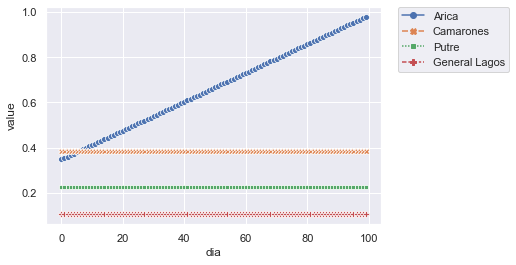

In [12]:
plot = get_porcentajes_vacunacion_plot(variables, mappings)
plt.savefig("by_comuna.png")

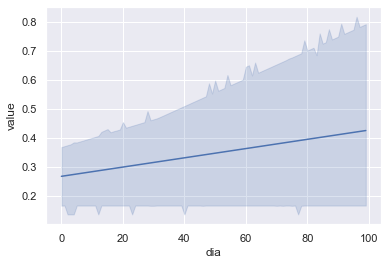

In [13]:
plot2 = get_porcentajes_vacunacion_target_plot(variables, mappings)
plt.savefig("median_with_var.png")